In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('bmh')

In [2]:
df = pd.read_csv('2021-04-22_copy.csv', index_col=0)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,MS Zaandam,9,0,2,0,7,0,0,0,0,0,0,0,0,Ship
217,Saint Kitts and Nevis,44,0,0,0,44,0,0,0,822,0,12381,231421,53500,North America
218,Greenland,31,0,0,0,31,0,0,0,545,0,20669,363577,56849,North America
219,Marshall Islands,4,0,0,0,4,0,0,0,67,0,0,0,59510,Australia/Oceania


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     221 non-null    object
 1   TotalCases        221 non-null    int64 
 2   NewCases          221 non-null    int64 
 3   TotalDeaths       221 non-null    int64 
 4   NewDeaths         221 non-null    int64 
 5   TotalRecovered    221 non-null    int64 
 6   NewRecovered      221 non-null    int64 
 7   ActiveCases       221 non-null    int64 
 8   Serious,Critical  221 non-null    int64 
 9   Tot Cases/1M pop  221 non-null    int64 
 10  Deaths/1M pop     221 non-null    int64 
 11  TotalTests        221 non-null    int64 
 12  Tests/1M pop      221 non-null    int64 
 13  Population        221 non-null    int64 
 14  Continent         221 non-null    object
dtypes: int64(13), object(2)
memory usage: 27.6+ KB


# Sử dụng Heatmap để biểu thị tương quan giữa các thuộc tính

In [4]:
df.head()
df.columns.drop(['Country,Other', 'Continent'])

Index(['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population'],
      dtype='object')

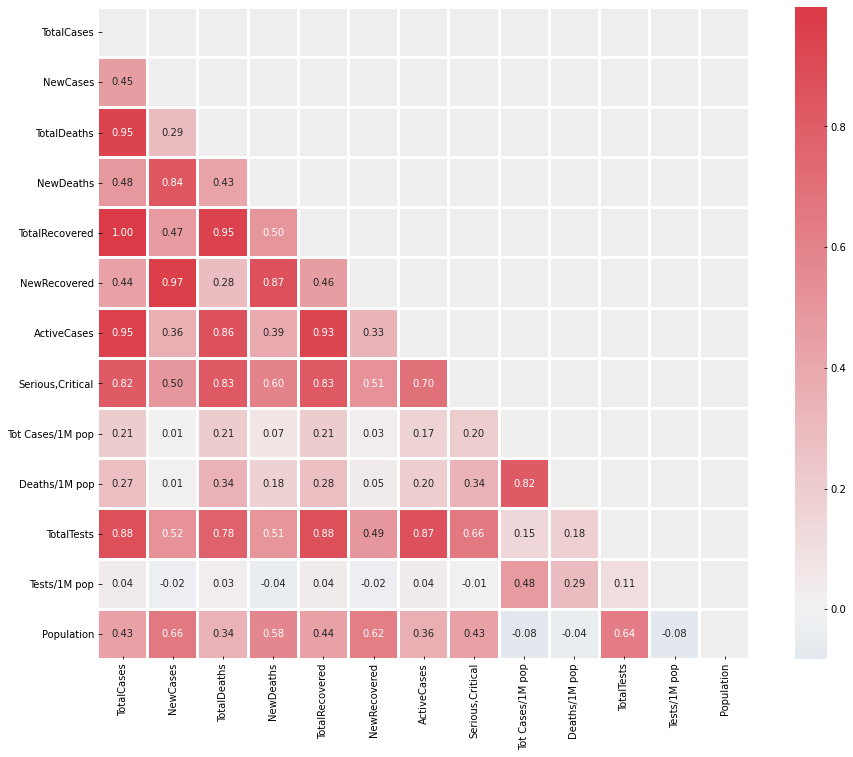

In [5]:
features = df.columns.drop(['Country,Other', 'Continent'])
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# [df['Severity'] == 4]

plt.figure(figsize=(16,12))
sns.heatmap(df[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

### Hệ số tương quan giữa X, Y  ở đây được tính như sau:
$$ p(X,Y) = \frac{E[(X - \mu_x)(Y - \mu_y)]}{\sigma_x\sigma_y} $$

Giá trị của ρ nằm giữa -1 và +1.
Các giá trị gần +1 cho biết sự hiện diện của mối quan hệ dương mạnh mẽ giữa X và Y, trong khi những giá trị gần -1 cho thấy mối quan hệ âm mạnh mẽ giữa X và Y.
Giá trị gần bằng 0 có nghĩa là không có bất kỳ mối quan hệ nào giữa X và Y.

## Ta lọc ra các cặp thuộc tính có mức độ tương qua lớn hơn 0.8 (có màu đỏ ở đồ thị phía trên)

In [6]:
list_pair = dict()
corr_df = df[features].corr()
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        colname_1 = features[i]
        colname_2 = features[j]
        corr = corr_df[colname_1][colname_2]
        if corr > 0.8:
            list_pair[(colname_1, colname_2)] =  corr
list_pair=sorted(list_pair.items(), key=lambda x: x[1])
print("Top các cặp thuộc tính có mối tương quan cao")
list_pair

Top các cặp thuộc tính có mối tương quan cao


[(('TotalCases', 'Serious,Critical'), 0.8160173734793086),
 (('Tot\xa0Cases/1M pop', 'Deaths/1M pop'), 0.8186982448810672),
 (('TotalRecovered', 'Serious,Critical'), 0.8304092296886083),
 (('TotalDeaths', 'Serious,Critical'), 0.8329726315240134),
 (('NewCases', 'NewDeaths'), 0.8441923214261656),
 (('TotalDeaths', 'ActiveCases'), 0.8644300714207769),
 (('NewDeaths', 'NewRecovered'), 0.8663169315542717),
 (('ActiveCases', 'TotalTests'), 0.8696661915730348),
 (('TotalRecovered', 'TotalTests'), 0.876623387157993),
 (('TotalCases', 'TotalTests'), 0.8833766180466909),
 (('TotalRecovered', 'ActiveCases'), 0.93198983214725),
 (('TotalCases', 'TotalDeaths'), 0.9453127557970611),
 (('TotalDeaths', 'TotalRecovered'), 0.94916637809481),
 (('TotalCases', 'ActiveCases'), 0.9538050785868635),
 (('NewCases', 'NewRecovered'), 0.9724278158859612),
 (('TotalCases', 'TotalRecovered'), 0.9978140953867439)]

# Với kết quả ở phía trên ta sẽ đi phân tích xem từng cặp

### 1. TotalCase và thuộc tính liên quan

Ta thấy cặp thuộc tính `TotalCases, TotalRecovered` có tỉ lệ tương là 99.8%, khá cao nhưng cũng khá hợp lí. Bởi vì số ca nhiễm càng cao thì số ca hồi phục cũng sẽ cao, ở các cặp thuộc tính ở phía trên, ta thấy rằng giá trị TotalCases sẽ kéo theo các thuộc tính khác như: `TotalRecovered, ActiveCases, TotalDeaths, TotalTests, Serious_Critical`

Bây giờ ta thử dùng biểu đồ đường để xem giữa thuộc tính TotalCases và các thuộc tính liên quan của nó ảnh hưởng với nhau theo tỉ lệ nào (thuận hay ngược)

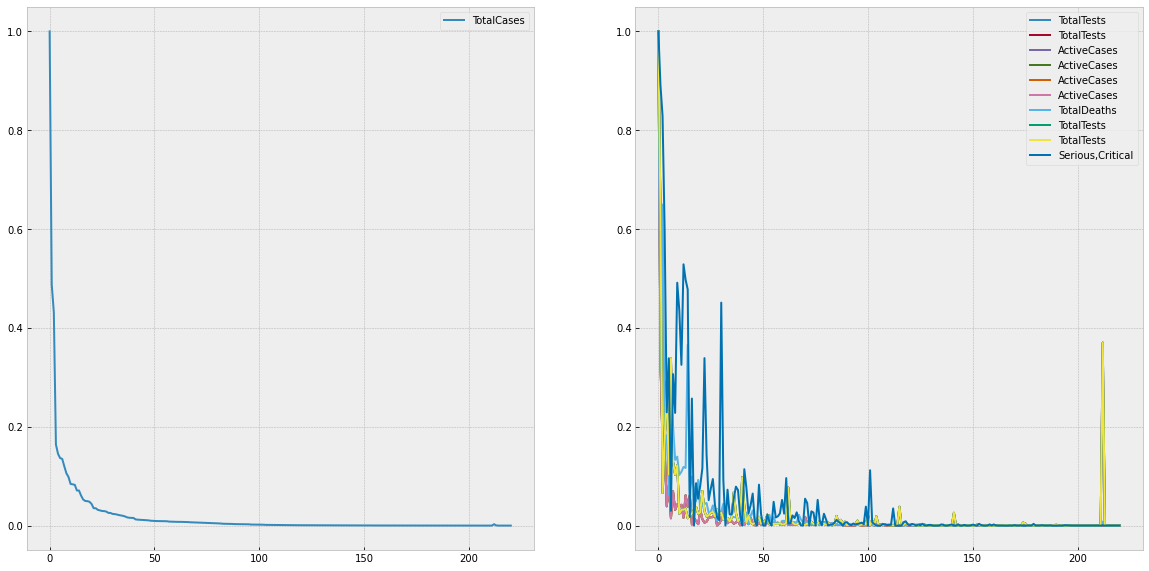

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
columns = ['TotalCases', 'TotalTests', 'ActiveCases', 'ActiveCases', 'TotalDeaths', 'TotalTests', 'Serious,Critical']
data = df[columns]
data_scale = data - data.min()
data_scale /= data_scale.max()
data = pd.concat([df['Country,Other'], data_scale],axis=1)
ax[0].plot(data['TotalCases'], label='TotalCases')
for column in columns[1:]:
    ax[1].plot(data[column], label=column)

ax[0].legend()
ax[1].legend()
plt.show()

## Để ý thấy rằng có 2 thuộc tính có sự phân phối lệch so với `TotalCases`, đó là: `TotalTests` và `Serious_Critical`. Ta thử tìm hiểu xem

### 1. So sánh `TotalCases` và `TotalTests`

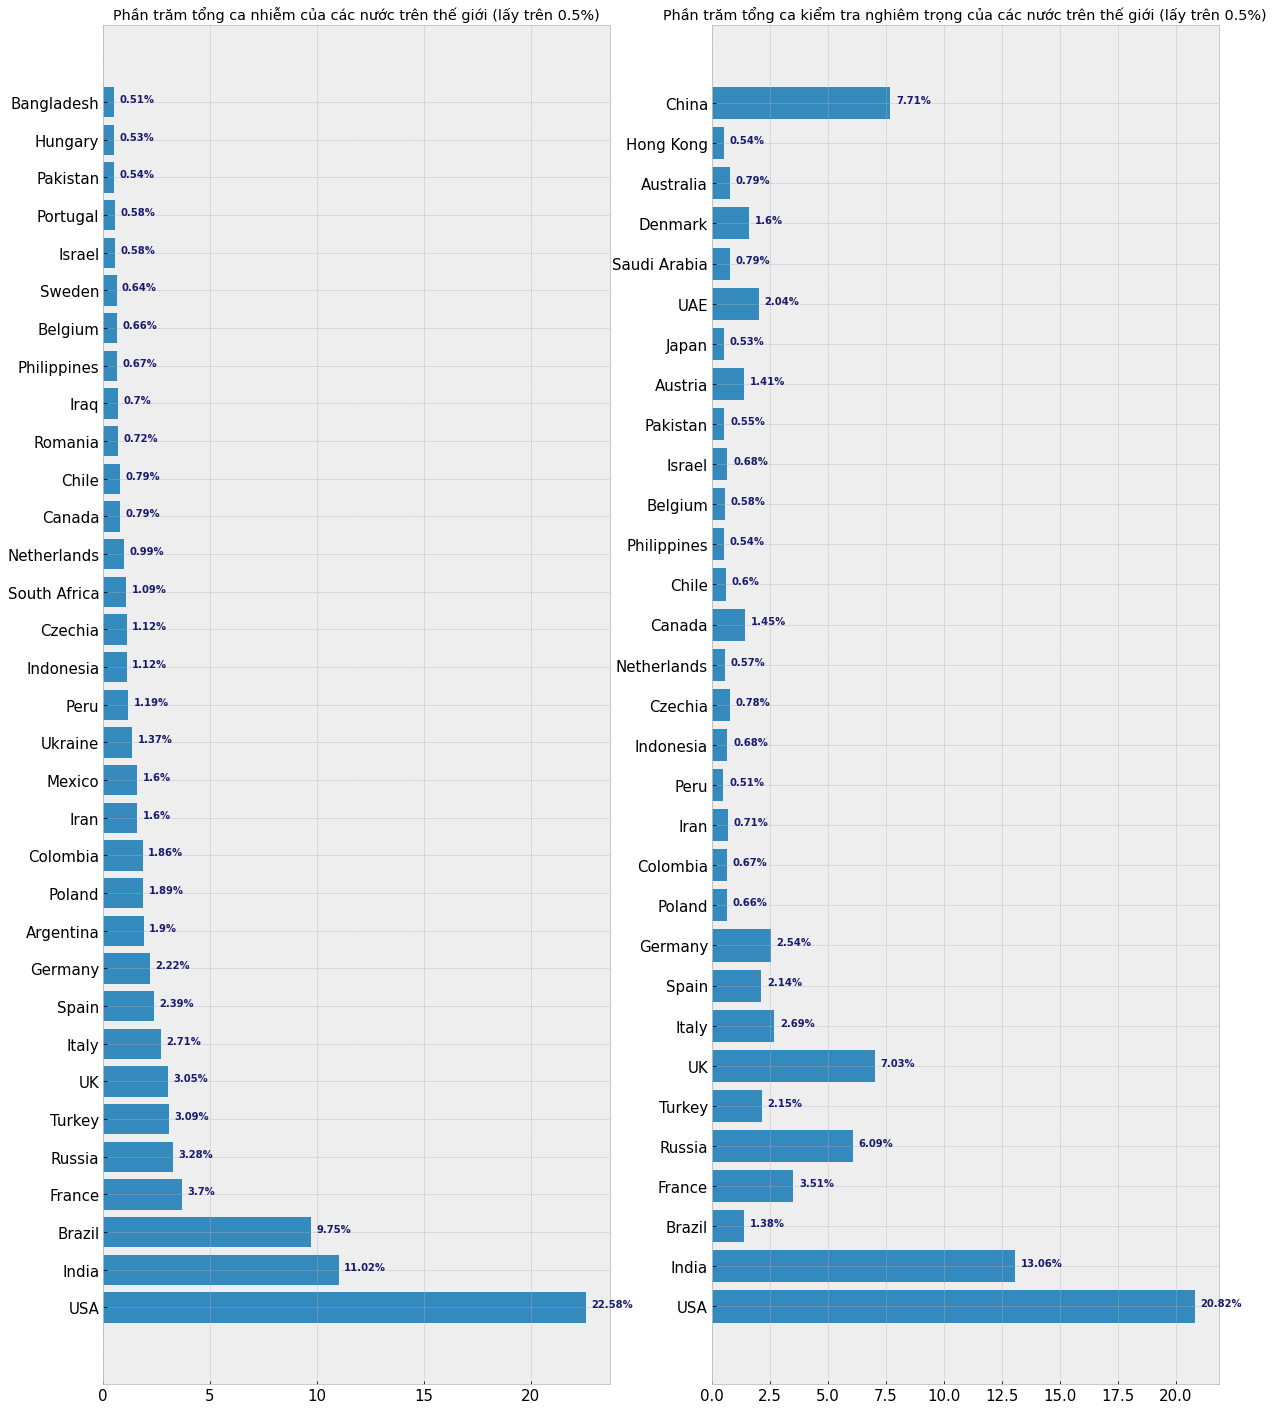

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.5, title=title)

title='Phần trăm tổng ca kiểm tra nghiêm trọng của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalTests', ax[1], min_sup=0.5, title=title)

### => Có một số nước kiểm tra nhiều nhưng lại có số ca nhiễm lại ít, chứng tỏ rằng một số nước kiểm tra y tế rất tích cực hoặc là số liệu gian lận. Ta thấy 2 kết quả trên lệch nhất là ở 2 nước `China` và `Brazil`, ta thử xem số liệu của 2 nước này xem 

In [9]:
df[(df['Country,Other'] == 'Brazil') | (df['Country,Other'] == 'China')]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
212,China,90541,21,4636,0,85600,27,305,6,63,3,160000000,111163,1439323776,Asia


### 2. So sánh `TotalCases` và `Serious_Critical`

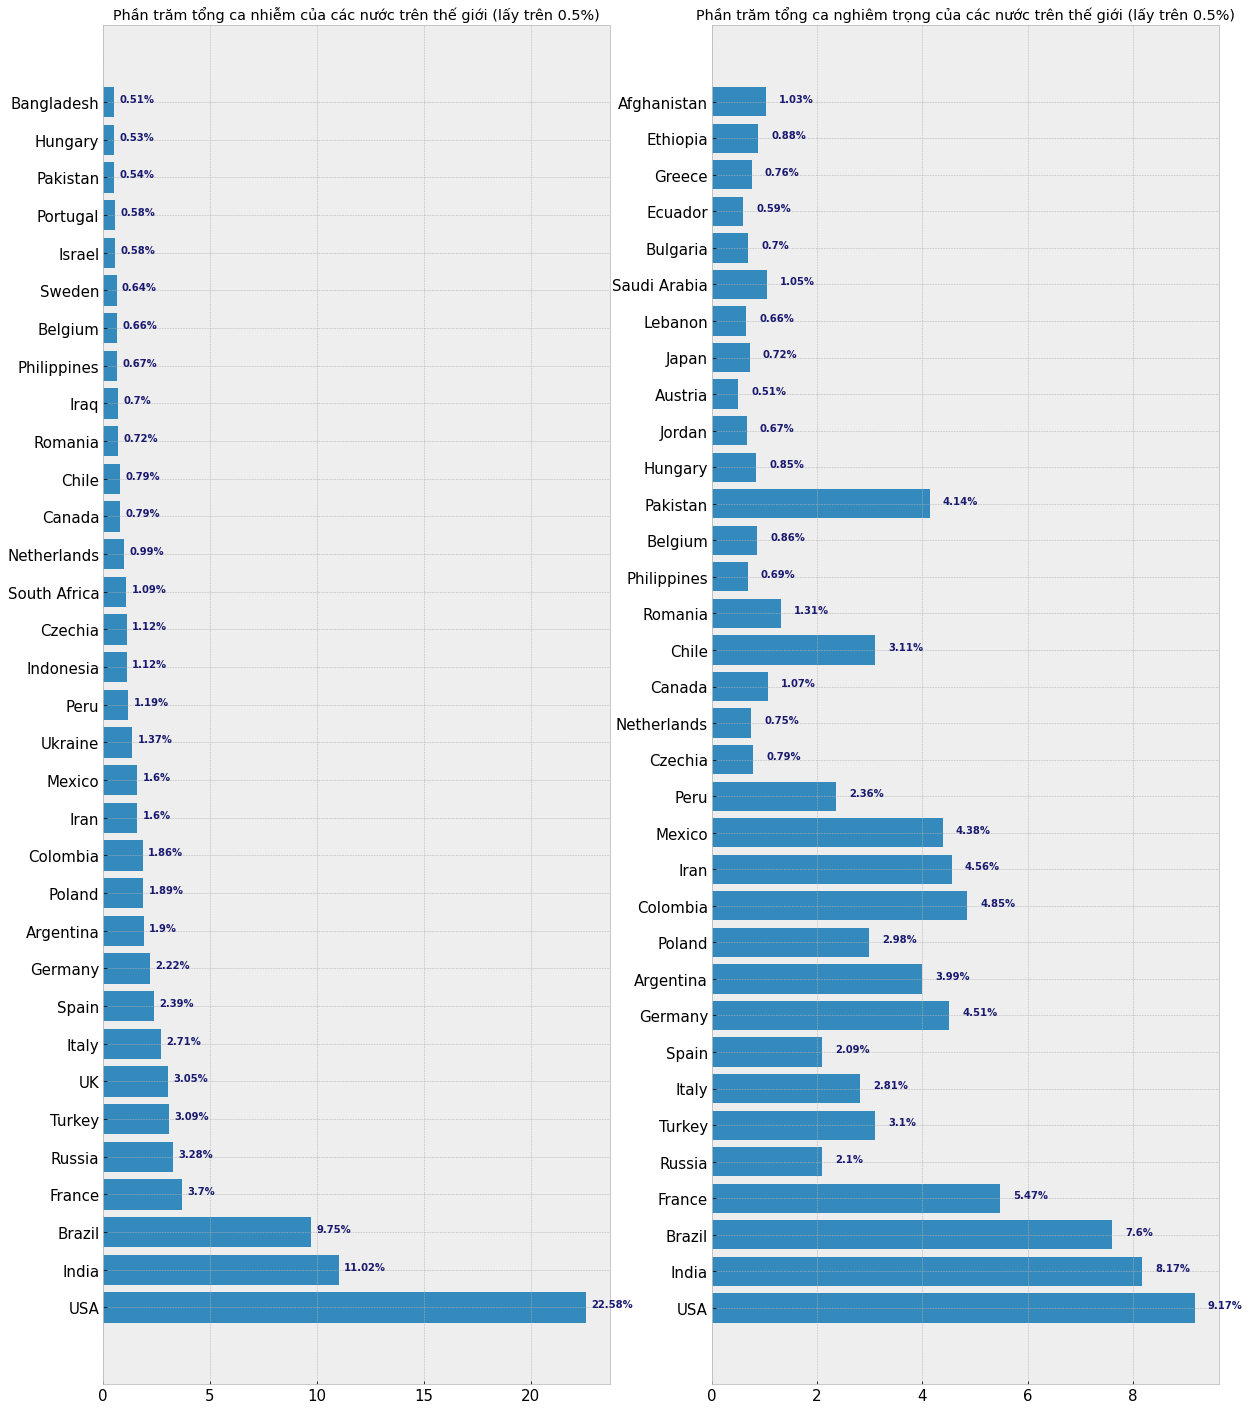

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.5, title=title)

title='Phần trăm tổng ca nghiêm trọng của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'Serious,Critical', ax[1], min_sup=0.5, title=title)

### => Nhìn chung số ca nghiêm trọng có lẽ không phụ thuộc lắm vào số lượng ca nhiễm. 

# Thử xét một số cặp thuộc tính có độ tương quan cao nhất

In [11]:
list_pair

[(('TotalCases', 'Serious,Critical'), 0.8160173734793086),
 (('Tot\xa0Cases/1M pop', 'Deaths/1M pop'), 0.8186982448810672),
 (('TotalRecovered', 'Serious,Critical'), 0.8304092296886083),
 (('TotalDeaths', 'Serious,Critical'), 0.8329726315240134),
 (('NewCases', 'NewDeaths'), 0.8441923214261656),
 (('TotalDeaths', 'ActiveCases'), 0.8644300714207769),
 (('NewDeaths', 'NewRecovered'), 0.8663169315542717),
 (('ActiveCases', 'TotalTests'), 0.8696661915730348),
 (('TotalRecovered', 'TotalTests'), 0.876623387157993),
 (('TotalCases', 'TotalTests'), 0.8833766180466909),
 (('TotalRecovered', 'ActiveCases'), 0.93198983214725),
 (('TotalCases', 'TotalDeaths'), 0.9453127557970611),
 (('TotalDeaths', 'TotalRecovered'), 0.94916637809481),
 (('TotalCases', 'ActiveCases'), 0.9538050785868635),
 (('NewCases', 'NewRecovered'), 0.9724278158859612),
 (('TotalCases', 'TotalRecovered'), 0.9978140953867439)]

In [12]:
len(list_pair)

16

### 1. Xét cặp có độ tương quan cao nhất ` TotalCases` và `TotalRecovered `

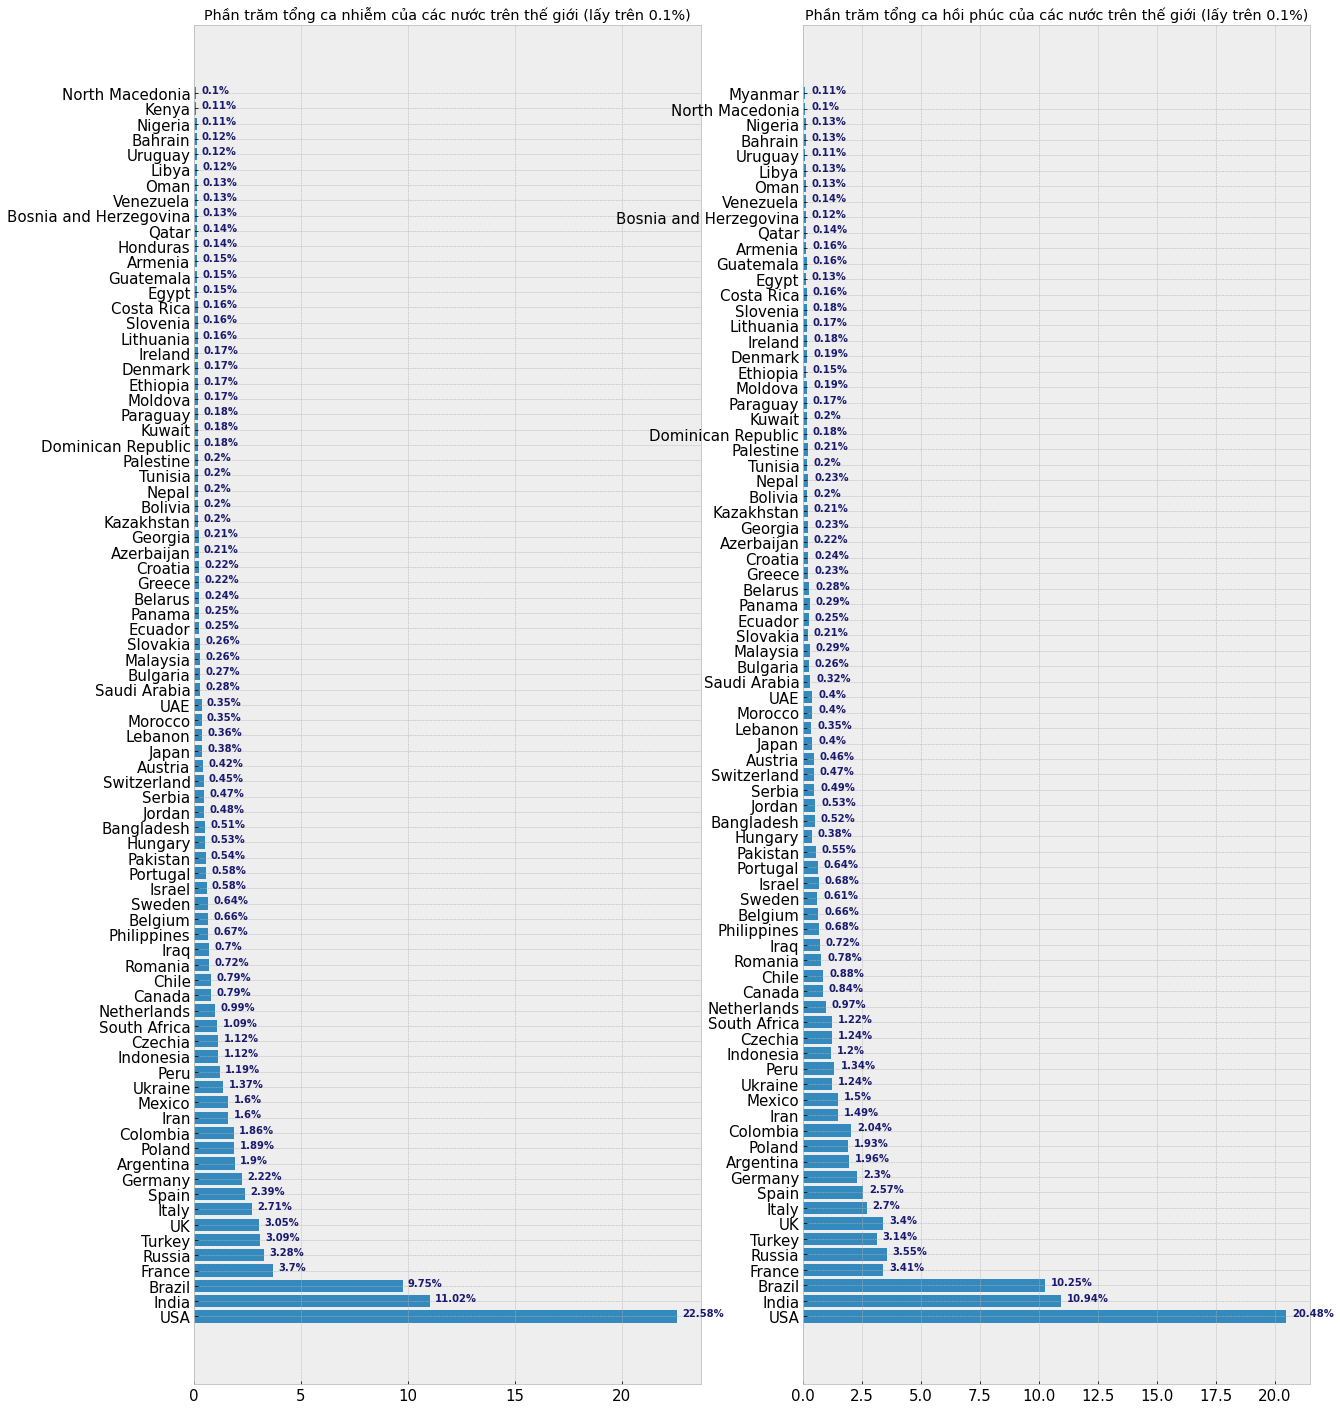

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.1%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.1, title=title)

title='Phần trăm tổng ca hồi phúc của các nước trên thế giới (lấy trên 0.1%)'
plot_ratio_barh(df, 'TotalRecovered', ax[1], min_sup=0.1, title=title)

### Dữ liệu rất đẹp, chứng tỏ hai thuộc tính có mối quan hệ kéo theo chặt chẽ, tức là số lượng ca nhiễm càng nhiều thì số lượng ca hồi phục cũng nhiều tương ứng. Điều này cho ta thấy rằng bệnh nhiễm virus này có một chu kì nhiễm nhất định ( tức là cứ sau một thời gian nhất định nào đó thì người bệnh sẽ hồi phục)